# Tugas
Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

## Pengerjaan

#### **Langkah 1 : Import Library**
Mengimpor semua library yang akan digunakan untuk pemrosesan gambar, model SVM, dan evaluasi.

In [1]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#### **Langkah 2 : Menentukan Direktori Gambar**
Menetapkan lokasi folder yang berisi data training dan testing.

In [2]:
train_dir = "images/images/training/"
test_dir = "images/images/test/"

#### **Langkah 3 : Load Image dan Label dari Direktori**
Membaca image dari direktori dan mengaitkannya dengan label yang diambil dari nama folder.

In [3]:
def load_images_and_labels(img_dir):
    p = Path(img_dir)  # Membuat objek Path untuk direktori
    dirs = list(p.glob('*'))  # Mengambil semua folder di dalam direktori

    img_list = []  # Daftar untuk menyimpan image dan label

    # Mengiterasi setiap folder untuk memuat image
    for dir in dirs:
        label = str(dir).split('/')[-1]  # Mengambil label dari nama folder (day/night)
        for file in dir.glob('*.jpg'):  # Mengiterasi semua file jpg dalam folder
            img = cv2.imread(str(file))  # Memuat image

            if img is not None:  # Memeriksa apakah image berhasil dimuat
                img_list.append((img, label))  # Menyimpan pasangan (image, label)
    
    return img_list  # Mengembalikan daftar image dan label

#### **Langkah 4 : Load Image Training**
Menggunakan kode di bawah untuk load semua image dan label dari direktori training.

In [4]:
train_img = load_images_and_labels(train_dir)

#### **Langkah 5 : Cek Jumlah Image yang Dimuat (Load)**
Menampilkan jumlah image yang berhasil dimuat untuk memastikan data sudah tersedia.

In [5]:
print(f"Jumlah image training yang dimuat: {len(train_img)}")

Jumlah image training yang dimuat: 240


#### **Langkah 6 : Fitur Histogram**
Menghitung histogram untuk setiap channel warna (Red, Green, Blue) dari image dan normalisasi hasilnya.

In [6]:
def calc_histogram_features(image, bins=32, visualize=False):
    # Mengonversi image ke RGB jika belum
    if len(image.shape) == 3 and image.shape[2] == 3:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi dari BGR ke RGB
    else:
        image_rgb = image  # Jika sudah RGB, gunakan image asli
    
    # Menghitung histogram untuk setiap channel warna
    hist_r = cv2.calcHist([image_rgb], [0], None, [bins], [0, 256])  # Histogram channel merah
    hist_g = cv2.calcHist([image_rgb], [1], None, [bins], [0, 256])  # Histogram channel hijau
    hist_b = cv2.calcHist([image_rgb], [2], None, [bins], [0, 256])  # Histogram channel biru
    
    # Normalisasi histogram
    hist_r = cv2.normalize(hist_r, hist_r).flatten()
    hist_g = cv2.normalize(hist_g, hist_g).flatten()
    hist_b = cv2.normalize(hist_b, hist_b).flatten()
    
    # Menggabungkan histogram menjadi satu vektor fitur
    hist_features = np.concatenate((hist_r, hist_g, hist_b))
    
    # Visualisasi histogram
    if visualize:
        plt.figure(figsize=(12, 8))
        
        # Histogram channel merah
        plt.subplot(3, 1, 1)
        plt.plot(hist_r, color='r', label='Red')  # Histogram channel merah
        plt.title('Histogram Channel Red')
        plt.xlim([0, bins])  # Mengatur batas sumbu X
        plt.legend()

        # Histogram channel hijau
        plt.subplot(3, 1, 2)
        plt.plot(hist_g, color='g', label='Green')  # Histogram channel hijau
        plt.title('Histogram Channel Green')
        plt.xlim([0, bins])  # Mengatur batas sumbu X
        plt.legend()

        # Histogram channel biru
        plt.subplot(3, 1, 3)
        plt.plot(hist_b, color='b', label='Blue')  # Histogram channel biru
        plt.title('Histogram Channel Blue')
        plt.xlim([0, bins])  # Mengatur batas sumbu X
        plt.legend()

        plt.tight_layout()
        plt.show()
    
    return hist_features  # Mengembalikan fitur histogram

#### **Langkah 7 : Menyimpan Fitur dan Label**
Menghitung fitur histogram untuk setiap image dan menyimpan hasilnya ke dalam daftar.

In [7]:
features = []  # Daftar untuk menyimpan fitur
labels = []  # Daftar untuk menyimpan label

# Mengiterasi setiap pasangan (image, label) untuk menghitung fitur histogram
for idx, (img, label) in enumerate(train_img):
    hist_features = calc_histogram_features(img)  # Menghitung fitur histogram untuk image
    features.append(hist_features)  # Menyimpan fitur
    labels.append(label)  # Menyimpan label

#### **Langkah 8 : Konversi ke Array Numpy**
Mengonversi daftar fitur dan label menjadi array numpy untuk mempermudah pemrosesan lebih lanjut.

In [8]:
X = np.array(features)  # Fitur
y = np.array(labels)  # Label

#### **Langkah 9 : Bagi Data Menjadi Set Training dan Validasi**
Membagi data menjadi dua bagian, satu untuk melatih model dan satu untuk mengevaluasi kinerja model.

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Langkah 10 : Membuat dan Melatih Model SVM**
Membuat model SVM dengan kernel linear dan melatihnya dengan data training.

In [10]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)  # Melatih model dengan data training

SVC(kernel='linear')

#### **Langkah 11 : Evaluasi Model**
Menggunakan data validasi untuk memprediksi label dan menampilkan laporan klasifikasi serta confusion matriks untuk mengevaluasi kinerja model.

In [11]:
# Akurasi Training
train_accuracy = svm_model.score(X_train, y_train)  # Menghitung akurasi data training
print(f"Akurasi Training: {train_accuracy:.3f}")

# Akurasi Testing
y_pred = svm_model.predict(X_val)  # Memprediksi label untuk data validasi
test_accuracy = np.mean(y_pred == y_val)  # Menghitung akurasi data testing
print(f"Akurasi Testing: {test_accuracy:.3f}")

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=["day", "night"]))  # Menampilkan laporan klasifikasi

# Menampilkan confusion matriks
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))  # Menampilkan confusion matriks

Akurasi Training: 0.990
Akurasi Testing: 0.979
Classification Report:
              precision    recall  f1-score   support

         day       1.00      0.96      0.98        24
       night       0.96      1.00      0.98        24

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48

Confusion Matrix:
[[23  1]
 [ 0 24]]


#### **Langkah 12 : Visualisasi Histogram**
Memilih image acak dari data training dan menampilkan histogramnya untuk analisis visual.

Image 220
Label: images\images\training\night


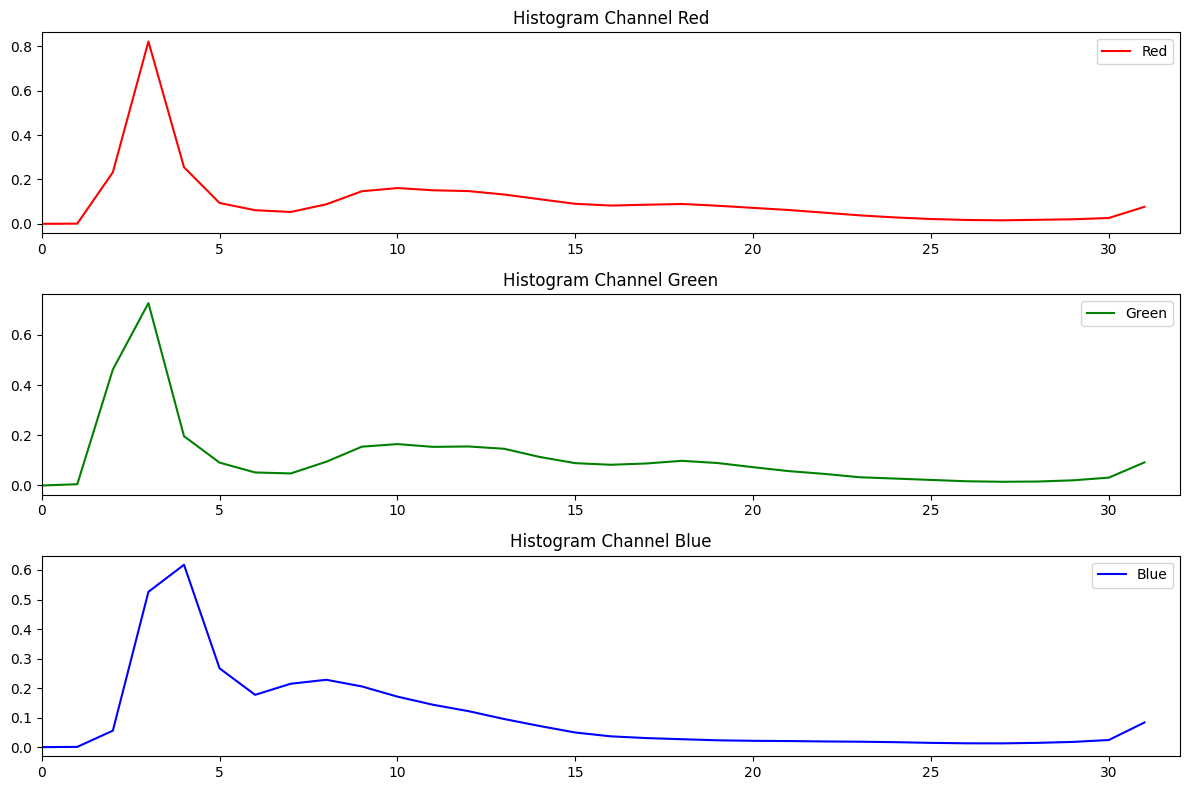

array([0.00000000e+00, 8.91156262e-04, 2.32483327e-01, 8.22425842e-01,
       2.55140394e-01, 9.39524919e-02, 6.13989085e-02, 5.34517877e-02,
       8.80368575e-02, 1.46914735e-01, 1.61290497e-01, 1.51273772e-01,
       1.47624135e-01, 1.32152021e-01, 1.10966548e-01, 9.01856050e-02,
       8.24583396e-02, 8.60727951e-02, 8.95406827e-02, 8.15525278e-02,
       7.19520748e-02, 6.23105839e-02, 5.03298081e-02, 3.81379724e-02,
       2.87104752e-02, 2.17014141e-02, 1.74185876e-02, 1.57330129e-02,
       1.81719661e-02, 2.05171145e-02, 2.63770539e-02, 7.65661523e-02,
       9.13050462e-06, 5.15569188e-03, 4.62213546e-01, 7.26824701e-01,
       1.96445867e-01, 9.10767913e-02, 5.19099645e-02, 4.80112396e-02,
       9.46772471e-02, 1.54695109e-01, 1.64966926e-01, 1.53964669e-01,
       1.55465111e-01, 1.46374166e-01, 1.13686964e-01, 8.90132934e-02,
       8.25975910e-02, 8.77898037e-02, 9.83233675e-02, 8.95672143e-02,
       7.29496926e-02, 5.73334843e-02, 4.62520942e-02, 3.28150354e-02,
      

In [12]:
rand_idx = random.randint(0, len(train_img) - 1)  # Memilih index acak
img, label = train_img[rand_idx]  # Mengambil image dan label berdasarkan index

# Memeriksa ukuran image
print(f'Image {rand_idx}')
print(f"Label: {label}")
calc_histogram_features(img, visualize=True)  # Menampilkan histogram dengan visualize=True